### Exploratory data analysis

- Learn about the dataset.
- Figure out which features are continuous, which ones are categorical.
- Check if there are obvious relationships between the features.
- Take a look at the distribution of each feature.

In [1]:
import sys

# change sys path to previous folder
sys.path.append("..")


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from helpers import load_csv_data

#### Load the data

In [2]:
features, _, class_labels, ids, _ = load_csv_data("../../data")


In [3]:
print("Number of data points =", features.shape[0])
print("Number of features =", features.shape[1])


Number of data points = 328135
Number of features = 321


#### Continuous vs. categorical features

We will count the number of unique values for each feature.

In [4]:
feature_unique_els = {}
for i in range(len(features.T)):
    # get unique elements
    unique_els = np.unique(features.T[i])
    # remove nans
    unique_els = unique_els[~np.isnan(unique_els)]
    # store the number of unique elements in a dictionary
    feature_unique_els[i] = len(unique_els)


In [5]:
print("{:<28} {:<50}".format("FEATURE", "NUMBER OF UNIQUE VALUES"))
# print the frist 10
for key, value in list(feature_unique_els.items())[:10]:
    print("Feature {:<20} {:<50}".format(key, value))


FEATURE                      NUMBER OF UNIQUE VALUES                           
Feature 0                    53                                                
Feature 1                    12                                                
Feature 2                    414                                               
Feature 3                    12                                                
Feature 4                    31                                                
Feature 5                    2                                                 
Feature 6                    2                                                 
Feature 7                    21780                                             
Feature 8                    21780                                             
Feature 9                    1                                                 


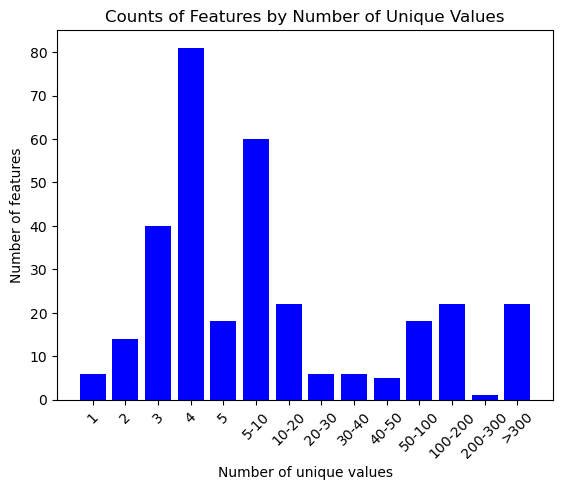

In [6]:
data = np.array(list(feature_unique_els.values()))
# define the intervals
intervals = [
    1,
    2,
    3,
    4,
    5,
    [5, 10],
    [10, 20],
    [20, 30],
    [30, 40],
    [40, 50],
    [50, 100],
    [100, 200],
    [200, 300],
    [300, np.max(data)],
]
# initialize a dictionary to store the counts
counts = {}
# count elements in the intervals
for i, interval in enumerate(intervals):
    if isinstance(interval, int):
        counts[f"{interval}"] = np.sum(data == interval)
    elif isinstance(interval, list):
        lower, upper = interval
        if lower != 300:
            counts[f"{lower}-{upper}"] = np.sum((data > lower)
                                                & (data <= upper))
        else:
            counts[f">300"] = np.sum((data > lower) & (data <= upper))

# plot the counts
plt.bar(counts.keys(), counts.values(), color="blue")
plt.xlabel("Number of unique values")
plt.ylabel("Number of features")
plt.title("Counts of Features by Number of Unique Values")
plt.xticks(rotation=45)
plt.show()


#### Missing values

We will check for missing values in the dataset. We will also check the percentage of missing values for each feature. 

In [10]:
# Percentage of missing data on whole dataset
print("Percentage of missing data on whole dataset:")
print(np.sum(np.isnan(features)) /
      (features.shape[0] * features.shape[1]) * 100)


Percentage of missing data on whole dataset:
44.78798165806975


In [17]:
feature_nans = {}
for i in range(len(features.T)):
    # store the number of missing elements in a dictionary
    feature_nans[i] = np.sum(np.isnan(features.T[i]))


In [18]:
print("{:<28} {:<50}".format("FEATURE", "NUMBER OF MISSING VALUES"))
# print the frist 10
for key, value in list(feature_nans.items())[:10]:
    print("Feature {:<20} {:<50}".format(key, value))


FEATURE                      NUMBER OF MISSING VALUES                          
Feature 0                    0                                                 
Feature 1                    0                                                 
Feature 2                    0                                                 
Feature 3                    0                                                 
Feature 4                    0                                                 
Feature 5                    0                                                 
Feature 6                    0                                                 
Feature 7                    0                                                 
Feature 8                    0                                                 
Feature 9                    139415                                            


In [19]:
# percentage of missing values per feature
print("{:<28} {:<50}".format("FEATURE", "PERCENTAGE OF MISSING VALUES"))
for feature in list(feature_nans.keys())[:10]:
    print(
        "Feature {:<20} {:<50.6f}".format(
            feature, (feature_nans[feature] / features.shape[0])
        )
    )

FEATURE                      PERCENTAGE OF MISSING VALUES                      
Feature 0                    0.000000                                          
Feature 1                    0.000000                                          
Feature 2                    0.000000                                          
Feature 3                    0.000000                                          
Feature 4                    0.000000                                          
Feature 5                    0.000000                                          
Feature 6                    0.000000                                          
Feature 7                    0.000000                                          
Feature 8                    0.000000                                          
Feature 9                    0.424871                                          


We will list the features that have more than X % (threshold) missing values.

In [84]:
# threshold for missing values
threshold = 0.5
# features to remove
features_to_remove = []
for feature in feature_nans.keys():
    if (feature_nans[feature] / features.shape[0]) >= threshold:
        features_to_remove.append(feature)
print(
    f"Number of features with more than {threshold*100}% missing values =",
    len(features_to_remove),
)

Number of features with more than 50.0% missing values = 147


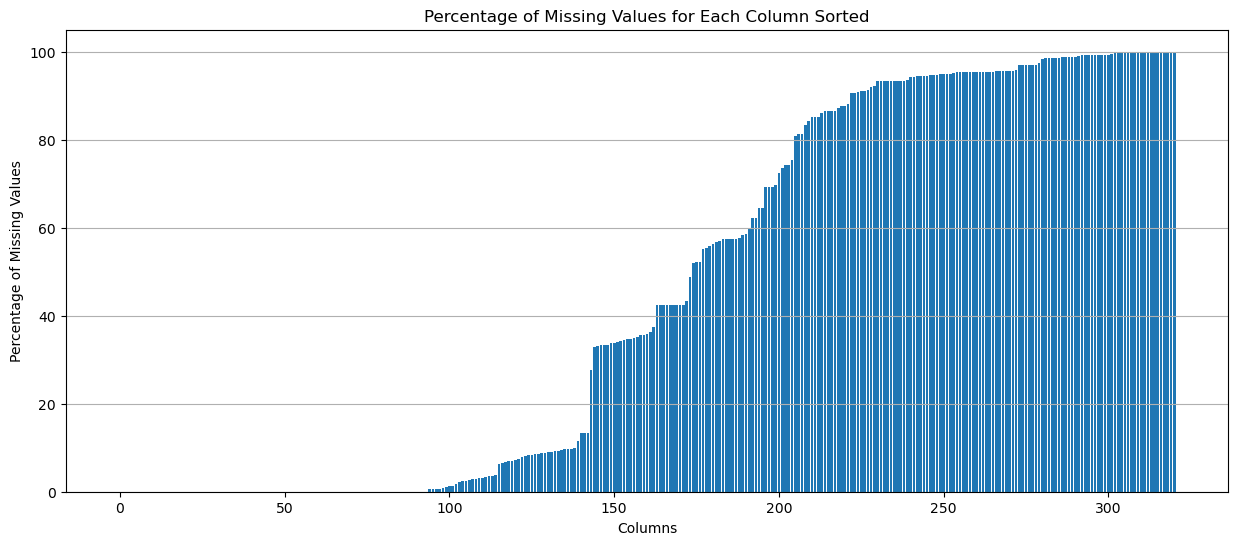

In [20]:
missing_percentage = np.sort(np.mean(np.isnan(features), axis=0) * 100)

plt.figure(figsize=(15, 6))
plt.bar(range(features.shape[1]), missing_percentage)
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing Values")
plt.title("Percentage of Missing Values for Each Column Sorted")
plt.grid(axis="y")

plt.show()

#### Correlation of features

Identify relationships between features.

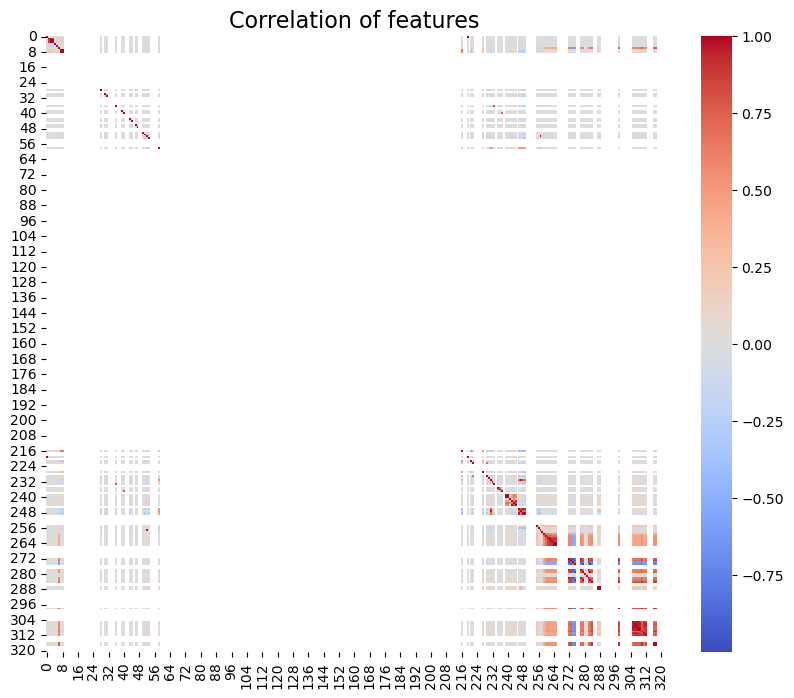

In [21]:
correlation_matrix = np.corrcoef(features, rowvar=False)
fig, ax = plt.subplots(figsize=(10, 8))
plt.title("Correlation of features", y=1, size=16)
sns.heatmap(correlation_matrix, square=True, cmap="coolwarm")
plt.show()

#### Distribution of features

First we will describe the features.

In [22]:
def describe(matrix, num_rows):
    # calculate the basic statistics for each feature
    count = np.count_nonzero(~np.isnan(matrix), axis=0)
    mean = np.nanmean(matrix, axis=0)
    std = np.nanstd(matrix, axis=0)
    min_val = np.nanmin(matrix, axis=0)
    max_val = np.nanmax(matrix, axis=0)
    # create a dictionary to store the statistics
    description = {
        "count": count,
        "mean": mean,
        "std": std,
        "min": min_val,
        "25%": np.nanpercentile(matrix, 25, axis=0),
        "50%": np.nanpercentile(matrix, 50, axis=0),
        "75%": np.nanpercentile(matrix, 75, axis=0),
        "max": max_val,
    }
    # print the table
    print(
        "{:<12} {:<20} {:<20} {:<20} {:<20} {:<20} {:<20} {:<20} {:<20}".format(
            "FEATURE", "COUNT", "MEAN", "STD", "MIN", "25%", "50%", "75%", "MAX"
        )
    )
    for i in range(min(matrix.shape[1], num_rows)):
        print(
            "{:<12} {:<20} {:<20.3f} {:<20.3f} {:<20.3f} {:<20.3f} {:<20.3f} {:<20.3f} {:<20.3f}".format(
                f"Feature {i}",
                count[i],
                mean[i],
                std[i],
                min_val[i],
                description["25%"][i],
                description["50%"][i],
                description["75%"][i],
                max_val[i],
            )
        )

In [23]:
# describe the first 10 features
describe(features, 10)


FEATURE      COUNT                MEAN                 STD                  MIN                  25%                  50%                  75%                  MAX                 
Feature 0    328135               29.974               16.032               1.000                19.000               29.000               44.000               72.000              
Feature 1    328135               6.361                3.487                1.000                3.000                6.000                9.000                12.000              
Feature 2    328135               6563638.198          3489242.352          1012016.000          3232015.000          6242015.000          10022015.000         12312015.000        
Feature 3    328135               6.417                3.493                1.000                3.000                6.000                10.000               12.000              
Feature 4    328135               14.496               8.334                1.000              

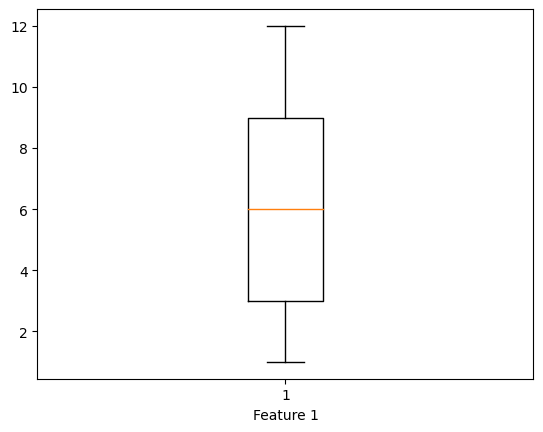

In [24]:
# choose feature index
index = 1
# get the feature
feature = features.T[index]
# plot the feature
fig, ax = plt.subplots()
ax.boxplot(feature)
ax.set_xlabel(f"Feature {index}")
plt.show()
